## Exploring the Influence of Gender and Parental Education on Developer Perspectives in the Tech Industry

In this notebook, we delve into a critical exploration aimed at understanding how gender and the highest level of education attained by an individual's parents shape their perspectives within the tech industry. Recognizing these differences is paramount for tech organizations striving towards more inclusive and equitable work environments. By uncovering the nuances in survey responses related to career satisfaction and views on diversity and inclusion, we seek to illuminate underlying trends that could significantly enhance diversity and inclusion initiatives.

Objectives
Gender Differences: Investigate if gender impacts individuals' perceptions of their workplace environment, especially concerning diversity and inclusion efforts.
Parental Education Influence: Examine the effect of parental education levels on individual career satisfaction and attitudes towards diversity in the tech sector.
Correlation Analysis: Determine the presence of statistical correlations between gender or parental education and career satisfaction or diversity perceptions.
Actionable Recommendations: Provide tech companies with evidence-based strategies to address any identified disparities and bolster support for a diverse workforce.
Expected Impact
This analysis is not just an academic exercise but a strategic tool for tech companies. Insights derived could guide the development of targeted recruitment and retention strategies, ensuring a more inclusive workplace that values diversity in all its forms.

Analysis Overview
To achieve our objectives, we will employ a comprehensive methodology encompassing:

Data Preprocessing: Ensuring the dataset's quality and consistency.
Exploratory Data Analysis (EDA): Understanding response distributions and uncovering initial patterns.
Statistical Testing: Investigating correlations and differences in responses based on gender and parental education.
Data Visualization: Effectively communicating our findings and insights.
This thorough approach will leverage survey data from developers, focusing on demographic information, career satisfaction, and diversity and inclusion perceptions.

Getting Started
We initiate our analysis by importing the essential libraries that will aid in data manipulation, processing, and visualization.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#df = pd.read_csv('survey-results-public.csv')
#filename = 'survey-results-public.csv'


In [12]:
def read_dataset(filename):
    """
    Reads a dataset from a specified file and prints the first 5 rows.

    Args:
    filename (str): The path to the file containing the dataset.

    Returns:
    pandas.DataFrame: The DataFrame created from the dataset.
    """
    df = pd.read_csv(filename)
    print(df.head(5))
    return df

In [13]:
def print_shape_info(df):
    """
    Prints the number of rows and columns of a DataFrame.

    Args:
    df (pandas.DataFrame): The DataFrame whose shape is to be printed.
    """
    num_rows, num_cols = df.shape
    print(f"The Number of rows: {num_rows}\nThe number of cols: {num_cols}")



In [14]:
def calculate_print_null_proportions(df, columns):
    """
    Calculates and prints the proportion of null values for specified columns.

    Args:
    df (pandas.DataFrame): The DataFrame to calculate null proportions for.
    columns (list): A list of column names to calculate null proportions for.
    """
    for column in columns:
        null_prop = df[column].isnull().sum() / df.shape[0]
        print(f'Nulls in {column}: {null_prop}')


In [15]:
def subset_dataframe(df, columns, fill_values):
    """
    Subsets a DataFrame based on specified columns and fills missing values with specified values.

    Args:
    df (pandas.DataFrame): The original DataFrame.
    columns (list): Columns to include in the subset.
    fill_values (dict): A dictionary specifying the fill values for missing data for each column.

    Returns:
    pandas.DataFrame: The subsetted and filled DataFrame.
    """
    return df.fillna(value=fill_values)


In [16]:
def group_infrequent_categories(df, column, infrequent_values, new_value='Other'):
    """
    Groups infrequent categories in a specified column into a single category.

    Args:
    df (pandas.DataFrame): The DataFrame to modify.
    column (str): The column name where infrequent categories are to be grouped.
    infrequent_values (list): A list of categories to be grouped into a new category.
    new_value (str): The name of the new category for the grouped values.

    Returns:
    pandas.DataFrame: The DataFrame with infrequent categories grouped.
    """
    df[column] = df[column].apply(lambda x: new_value if x in infrequent_values else x)
    return df

In [47]:
def visualize_data(df, x, hue, kind='count', title=None, xlabel=None, figsize=(12,6), rotation=None):
    """
    Visualizes data using seaborn's countplot or heatmap based on the kind.

    Args:
    df (pandas.DataFrame): The DataFrame to visualize.
    x (str): The column name to be plotted on the x-axis.
    hue (str): The column name to be used for color encoding.
    kind (str): The type of plot ('count' or 'heatmap').
    title (str): The plot title.
    xlabel (str): The label for the x-axis.
    figsize (tuple): The figure size.
    rotation (int): The rotation angle for x-axis labels (applicable to countplot).
    """
    plt.figure(figsize=figsize)
    if kind == 'count':
        sns.countplot(x=x, hue=hue, data=df)
        if rotation:
            plt.xticks(rotation=rotation)
    elif kind == 'heatmap':
        c_table = pd.crosstab(df[x], df[hue])
        sns.heatmap(c_table, cmap='viridis', annot=True, fmt='d')
        plt.ylabel(x)
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    plt.show()


In [48]:
def create_print_contingency_table(df, index, columns):
    """
    Creates and prints a contingency table based on specified index and columns.

    Args:
    df (pandas.DataFrame): The DataFrame to create the contingency table from.
    index (str): The column name to use as the index of the table.
    columns (str): The column name to use as the columns of the table.
    """
    contingency_table = pd.crosstab(index=df[index], columns=df[columns])
    print("Contingency Table:")
    print(contingency_table)
    return contingency_table


In [49]:
# Step 1: Read the dataset
filename = 'survey-results-public.csv'
df = read_dataset(filename)



   Respondent                                       Professional  \
0           1                                            Student   
1           2                                            Student   
2           3                             Professional developer   
3           4  Professional non-developer who sometimes write...   
4           5                             Professional developer   

                ProgramHobby         Country      University  \
0                  Yes, both   United States              No   
1                  Yes, both  United Kingdom  Yes, full-time   
2                  Yes, both  United Kingdom              No   
3                  Yes, both   United States              No   
4  Yes, I program as a hobby     Switzerland              No   

                         EmploymentStatus  \
0  Not employed, and not looking for work   
1                      Employed part-time   
2                      Employed full-time   
3                      Emp

In [50]:
# Step 2: Print the shape of the DataFrame
print_shape_info(df)


The Number of rows: 51392
The number of cols: 154


In [51]:
# Step 3: Calculate and print null proportions for selected columns
calculate_print_null_proportions(df, ['Gender', 'HighestEducationParents', 'DiversityImportant'])

Nulls in Gender: 0.3180456102117061
Nulls in HighestEducationParents: 0.3201665628891656
Nulls in DiversityImportant: 0.3986807285180573


In [52]:
# Step 4: Subset the DataFrame and fill missing values
fill_values = {'DiversityImportant': 'Unknown', 'Gender': 'Unknown', 'HighestEducationParents': 'Unknown'}
df_gender_education_diversity = subset_dataframe(df, ['Gender', 'HighestEducationParents', 'DiversityImportant'], fill_values)

In [53]:
# Step 5: Group infrequent categories in 'Gender' into 'Other'
infrequent_genders = [
    'Gender non-conforming', 'Other', 'Male; Gender non-conforming', 'Male; Female', 
    'Male; Other', 'Transgender', 'Transgender; Gender non-conforming', 'Female; Transgender', 
    'Female; Gender non-conforming', 'Male; Female; Transgender; Gender non-conforming', 'Male; Transgender',
    'Female; Transgender; Gender non-conforming', 'Gender non-conforming; Other', 'Male; Female; Transgender',
    'Male; Female; Gender non-conforming', 'Female; Other', 'Male; Female; Transgender; Gender non-conforming; Other', 
    'Male; Transgender; Gender non-conforming', 'Transgender; Other', 'Male; Gender non-conforming; Other',
    'Male; Female; Gender non-conforming; Other', 'Female; Transgender; Other', 'Female; Transgender; Gender non-conforming; Other',
    'Male; Female; Other', 'Male; Transgender; Other', 'Male; Female; Transgender; Other'
]
df_gender_education_diversity = group_infrequent_categories(df_gender_education_diversity, 'Gender', infrequent_genders)



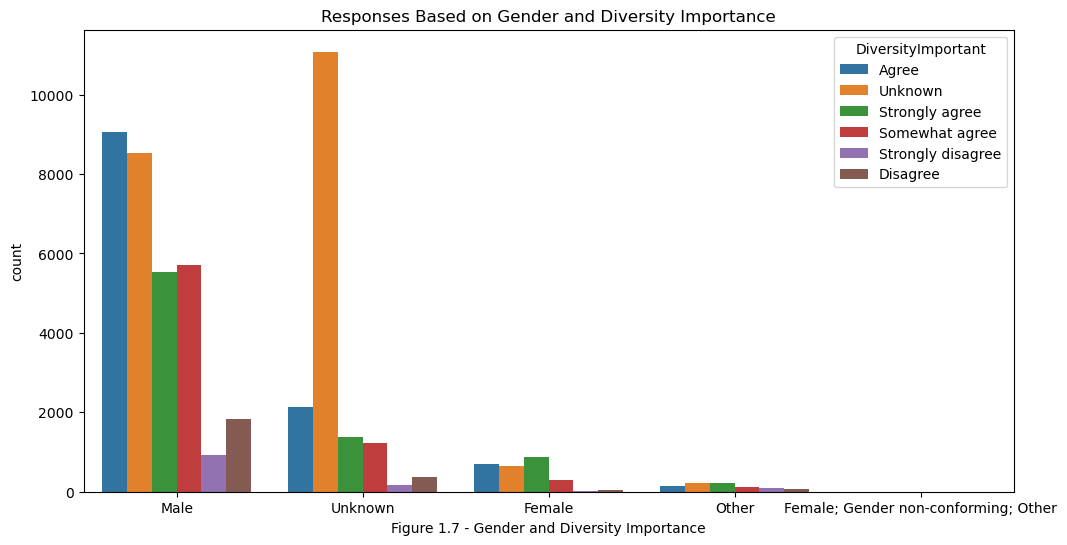

In [54]:
# Step 6: Visualize Gender and Diversity Importance
visualize_data(df_gender_education_diversity, 'Gender', 'DiversityImportant',kind='count',
               title='Responses Based on Gender and Diversity Importance', 
               xlabel='Figure 1.7 - Gender and Diversity Importance')

In [55]:
# Step 7: Create and print the contingency table for Gender and DiversityImportant
create_print_contingency_table(df_gender_education_diversity, 'Gender', 'DiversityImportant')


Contingency Table:
DiversityImportant                    Agree  Disagree  Somewhat agree  \
Gender                                                                  
Female                                  688        55             303   
Female; Gender non-conforming; Other      0         0               0   
Male                                   9064      1841            5713   
Other                                   138        68             115   
Unknown                                2121       363            1232   

DiversityImportant                    Strongly agree  Strongly disagree  \
Gender                                                                    
Female                                           881                 23   
Female; Gender non-conforming; Other               0                  0   
Male                                            5523                914   
Other                                            229                 82   
Unknown            

DiversityImportant,Agree,Disagree,Somewhat agree,Strongly agree,Strongly disagree,Unknown
Gender,,,,,,
Female,688,55,303,881,23,650
Female; Gender non-conforming; Other,0,0,0,0,0,1
Male,9064,1841,5713,5523,914,8534
Other,138,68,115,229,82,225
Unknown,2121,363,1232,1389,161,11079


In [61]:
# Step 8: Replace long category name in 'HighestEducationParents' for ease of visualization
df_gender_education_diversity['HighestEducationParents'] = df_gender_education_diversity['HighestEducationParents'].replace(
    "Some college/university study, no bachelor's degree", 
    'Some college/no bachelor')


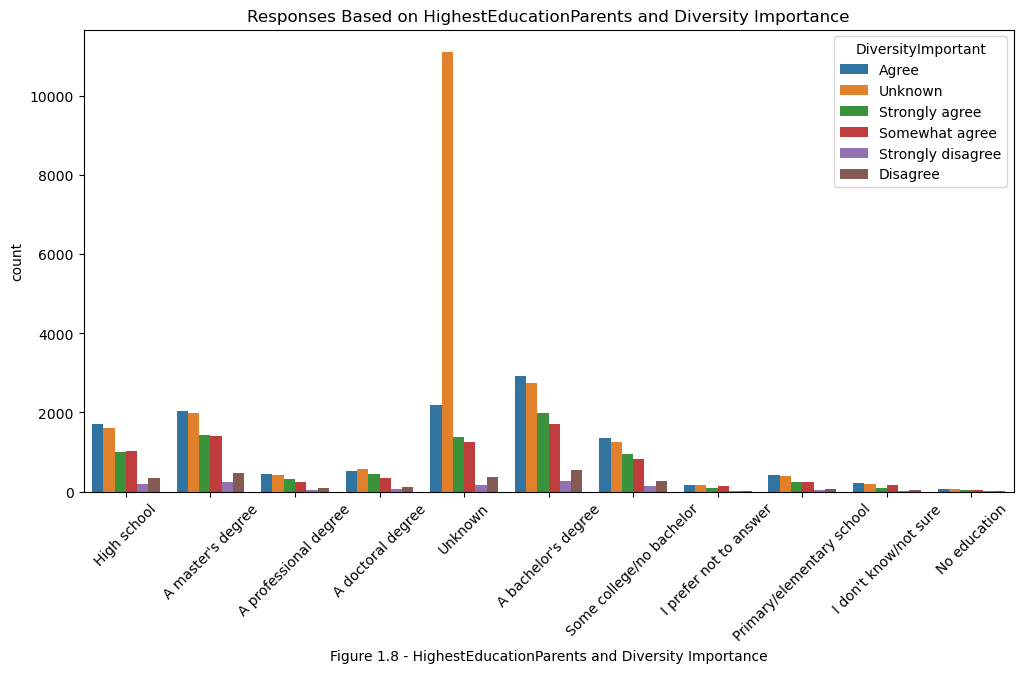

In [57]:
# Step 9: Visualize HighestEducationParents and Diversity Important
visualize_data(df_gender_education_diversity, 'HighestEducationParents', 'DiversityImportant', kind='count', 
               title='Responses Based on HighestEducationParents and Diversity Importance', 
               xlabel='Figure 1.8 - HighestEducationParents and Diversity Importance', rotation=45)

In [58]:
# Step 10: Create and print the contingency table for HighestEducationParents and DiversityImportant
contingency_table = create_print_contingency_table(df_gender_education_diversity, 'HighestEducationParents', 'DiversityImportant')

Contingency Table:
DiversityImportant         Agree  Disagree  Somewhat agree  Strongly agree  \
HighestEducationParents                                                      
A bachelor's degree         2912       552            1718            1993   
A doctoral degree            525       111             354             453   
A master's degree           2034       468            1392            1440   
A professional degree        433        96             233             327   
High school                 1708       352            1022            1003   
I don't know/not sure        211        43             155              98   
I prefer not to answer       172        23             131              97   
No education                  59        10              33              49   
Primary/elementary school    420        51             249             241   
Some college/no bachelor    1360       262             814             942   
Unknown                     2177       359   

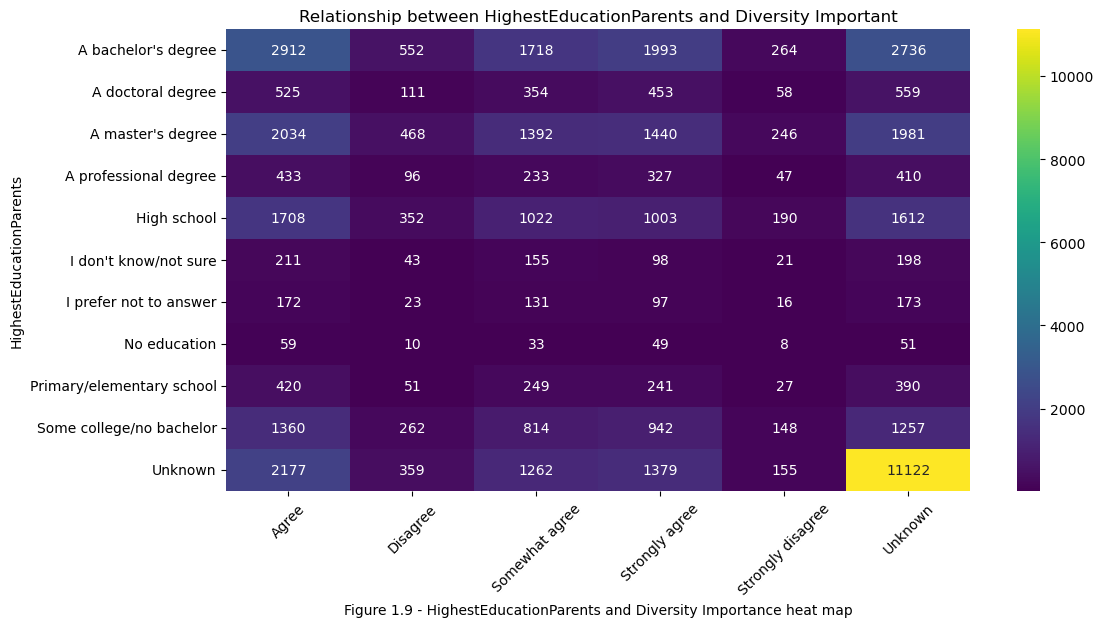

Contingency Table:
DiversityImportant         Agree  Disagree  Somewhat agree  Strongly agree  \
HighestEducationParents                                                      
A bachelor's degree         2912       552            1718            1993   
A doctoral degree            525       111             354             453   
A master's degree           2034       468            1392            1440   
A professional degree        433        96             233             327   
High school                 1708       352            1022            1003   
I don't know/not sure        211        43             155              98   
I prefer not to answer       172        23             131              97   
No education                  59        10              33              49   
Primary/elementary school    420        51             249             241   
Some college/no bachelor    1360       262             814             942   
Unknown                     2177       359   

In [62]:
# Step 11: Visualize the relationship between HighestEducationParents and Diversity Important using a heatmap
visualize_data(df_gender_education_diversity, 'HighestEducationParents', 'DiversityImportant', kind='heatmap', 
               title='Relationship between HighestEducationParents and Diversity Important', 
               xlabel='Figure 1.9 - HighestEducationParents and Diversity Importance heat map')

# Print the contingency table
print("Contingency Table:")
print(contingency_table)
print()


## Evaluation of Results

### Gender and Diversity Importance

The majority of responses come from individuals identifying as Male, followed by Female and Other. The category "Unknown" has a significant count, indicating a notable portion of respondents chose not to disclose their gender or it was not captured.
Across genders, there's a general trend towards agreement with the importance of diversity, with "Agree" and "Strongly agree" comprising a large portion of responses. However, the Male gender category shows a higher proportion of "Disagree" and "Strongly disagree" compared to Female and Other.
The "Unknown" category for gender has a very high number of unknown responses for diversity importance, possibly skewing the data analysis.

### Highest Education of Parents and Diversity Importance

Respondents whose parents have a bachelor's degree or higher education are more likely to agree or strongly agree with the importance of diversity. This trend suggests that parental education may influence respondents' views on diversity.
The "Unknown" category again shows a significant number of responses, emphasizing the need for careful consideration of missing data in analysis and interpretation.
Higher education levels (bachelor's, master's, doctoral) show less disagreement with the importance of diversity compared to lower education levels (high school, no education), indicating a potential correlation between parental education level and positive perceptions of workplace diversity.


### Conclusion and Next Steps

The analysis underscores the complexity of perceptions towards diversity and inclusion within the tech industry, influenced by factors such as gender and parental education. For tech companies aiming to foster inclusive workplaces, understanding these nuances is crucial. The next steps could involve qualitative research to explore the reasons behind these perceptions and to develop more targeted interventions. Additionally, repeating this analysis with updated or more comprehensive data could provide further insights, helping to track progress over time and refine diversity and inclusion strategies accordingly.